### TODO

- Create the AdaIN layer
- Create the reverse VGG19 model to have the decoder, and make it trainable
- Create a custom model
- Create content and style datasets from the loaded images

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ["KERAS_BACKEND"] = "torch"
import keras
from keras.layers import Layer
from keras.preprocessing import image, image_dataset_from_directory
from pathlib import Path

from adain_layer import AdaINLayer

In [ ]:
vgg = keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    name="vgg19"
)

# vgg.layers = vgg.layers[:13]

AttributeError: `Model.layers` attribute is reserved and should not be used. Please use another name.

In [13]:
# print([l for l in vgg.children
vgg.

<Conv2D name=block1_conv1, built=True>

torch.Size([3, 427, 640])


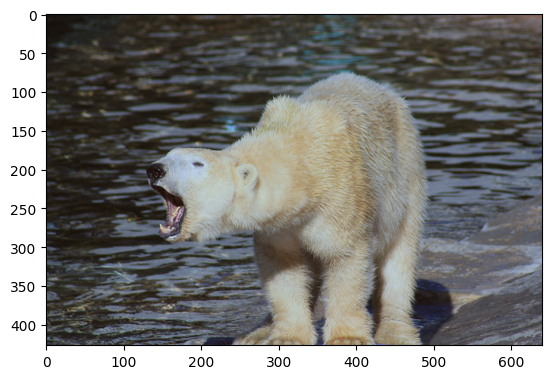

In [2]:
l = AdaINLayer()
c = torch.Tensor(keras.utils.img_to_array(image.load_img(Path("D:/StyleTransferAI/StyleTransferAI/datasets/unlabeled2017/unlabeled2017/000000000013.jpg")))).permute(2,0,1).to('cuda')
print(c.shape)
s = torch.Tensor(keras.ops.image.resize(keras.utils.img_to_array(image.load_img(Path("D:/StyleTransferAI/StyleTransferAI/datasets/WikiArt/Abstract_Expressionism/aaron-siskind_acolman-1-1955.jpg"))), c.shape[1:])).permute(2,0,1).to('cuda')


out = l([c,s])[0].clone().detach().cpu().permute(1,2,0).numpy()
plt.imshow((out - out.min()) / (out.max() - out.min()))

In [11]:
class VGGEncoder(Layer) :
    def __init__(self) :
        super().__init__()
        basis_vgg = keras.applications.VGG19(
            include_top=False,
            weights="imagenet",
            input_tensor=None,
            input_shape=None,
            pooling=None,
            name="vgg19"
        )
                
        self.encoder = keras.Sequential(basis_vgg.layers[:13])

    def build(self, input_shape) :
        pass

    def call(self, inputs) :
        return self.encoder(inputs)


In [17]:
v = VGGEncoder()

c = torch.Tensor([keras.utils.img_to_array(image.load_img(Path("D:/StyleTransferAI/StyleTransferAI/datasets/unlabeled2017/unlabeled2017/000000000013.jpg")))]).to('cuda')

v(c).shape

torch.Size([1, 53, 80, 512])